In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import scipy as sc
from scipy import random, linalg, stats, special

In [2]:
# 生成数据
NProperties = 1
NClasses = 4
NObjects = 200
distanceBTWclasses = 20
DiffBTWSpreadOFclasses = 2

# 四个分布的期望值
Mu = [np.random.random(NProperties)*distanceBTWclasses*i for i in range(1,NClasses+1)]
# 四个分布的标准差
Var = [np.random.random(NProperties)*DiffBTWSpreadOFclasses*i for i in range(1,NClasses+1)]

In [5]:
# (1)
# 每个分布出现概率设置成一样

theta = np.repeat(1.0/NClasses,NClasses)

print('每个分布权重 1 to '+str(NClasses))
print(theta)

每个分布权重 1 to 4
[0.25 0.25 0.25 0.25]


In [6]:
# (2)
# 生成每个分布各自数据量，使用多项式分布
r = np.random.multinomial(NObjects,theta)

print('每个分布数据量 1 to '+str(NClasses))
print(r)

每个分布数据量 1 to 4
[52 50 50 48]


In [14]:
# (3)
# 生成数据
rAlln = [np.random.normal(Mu[i], Var[i], r[i]) for i in range(0,NClasses)]

# 将数据放进一个array中
y = rAlln[0]
for i in range(NClasses-1):
    y = np.hstack((y,rAlln[i+1]))

# 记录每个点属于哪个分布
v_true = np.zeros((1)) 
# 生成各自数量的1，2，3，4
for i,j in enumerate(r):
    v_true = np.hstack((v_true, np.repeat(i+1, j)))
# 第一个1去掉
v_true = np.array(v_true[1:])
y_true = np.vstack((y, v_true))

# 随机排序
np.random.shuffle(y_true.T)

# y没有保留类别信息
y = y_true[0,:]

print (y)

[35.46516911 59.97870443 36.50427966 56.86953831 31.87360191 10.81381695
  8.72865172 65.66798189 32.74487374 55.61182504 34.91328184  8.7920578
 32.62597648 34.05078789 34.91658404 34.06571831 40.50684612 33.99204709
 37.55039122 38.76424575 11.09563284 37.93596103 56.36610018 38.85005329
 36.90677749 34.17886747 58.05755236 65.10145135  8.23603301 33.0935772
 38.03240073 66.15893254  8.25844488 35.03642788 62.46199171 10.90899686
  8.18667972  8.09554166 32.43999732 60.22226079 36.18158612 56.22069
 11.16162734 57.85668468 39.20345304 34.50147923 34.22818315 34.88552932
 40.56929869 33.06961116 10.69515017 33.55083689 47.47347781 41.69704016
 53.19973111 53.97090252 33.32861132 40.5692706  37.92410818 53.74841492
 67.40205685 33.25395722  9.04207435 55.94382228 62.30866301 35.24007087
 59.10970427 35.90471043 40.28870931 10.59254467 13.27743509 60.35840441
 33.01246392 14.13380931 33.53121867 59.50813673 62.39880248 62.79855123
 33.40368541 31.7330905  33.20061598 10.31345449  8.6679

In [16]:
# 引进v做为隐式变量，表示数据属于哪个分布，是之后需要推出来的，当前随机取值
v = np.array([random.randint(1, NClasses+1) for i in range(y.shape[0])])
print(v)

[3 3 1 2 3 1 4 2 3 1 2 3 2 2 1 1 2 4 4 3 3 3 4 1 4 4 2 4 2 1 2 2 3 2 3 1 3
 3 2 2 3 1 1 1 1 1 2 1 4 4 4 1 1 3 3 2 1 3 1 2 2 4 2 2 3 1 3 1 3 4 4 2 2 3
 1 1 1 3 2 3 1 3 2 2 1 3 4 1 4 4 2 4 1 2 1 3 4 3 4 1 1 3 3 1 2 1 2 3 2 1 4
 3 2 2 4 4 4 2 3 3 2 2 1 2 3 1 2 3 3 1 2 2 1 4 2 3 2 2 3 2 1 1 4 2 1 2 2 2
 4 4 1 4 4 3 1 2 2 1 4 3 4 1 3 4 1 4 1 1 3 3 3 1 3 1 2 2 1 1 3 2 1 4 4 4 3
 1 4 4 3 4 4 4 4 1 3 3 3 2 2 3]


In [21]:
## EM算法 ##
# 设定初始参数
broadness = 15
initMu = np.random.random(NClasses)*max(y)
initVar = np.random.random(NClasses)+broadness
initW = theta #np.random.random(NClasses)


In [22]:
# E-step
def EStep(y, w, Mu, Sigma):
    
    # r_ij
    r_ij = np.zeros((y.shape[0], Mu.shape[0]))
    
    for Object in range(y.shape[0]):
        
        r_ij_Sumj = np.zeros(Mu.shape[0])
        
        # 计算不同分布下x的概率
        for jClass in range(Mu.shape[0]):
            r_ij_Sumj[jClass] = w[jClass] * sc.stats.norm.pdf(y[Object], Mu[jClass], np.sqrt(Sigma[jClass]))
        
        # 计算x属于第j个分布的概率
        for jClass in range(r_ij_Sumj.shape[0]):
            r_ij[Object,jClass] =   r_ij_Sumj[jClass] / np.sum(r_ij_Sumj)
        
    return r_ij

In [23]:
r_n = EStep(y, initW, initMu, initVar)
print(r_n)

[[2.87733362e-18 8.03984545e-01 1.05926491e-13 1.96015455e-01]
 [1.62380842e-43 9.99999580e-01 2.10079918e-35 4.20105417e-07]
 [2.67324448e-19 8.76094136e-01 1.38381749e-14 1.23905864e-01]
 [2.74562491e-40 9.99997625e-01 1.24318805e-32 2.37530148e-06]
 [6.82573183e-15 3.87325588e-01 7.76396604e-11 6.12674412e-01]
 [7.14900182e-02 1.16009852e-09 9.28437664e-01 7.23165143e-05]
 [1.29711668e-01 1.58523820e-11 8.70285613e-01 2.71887133e-06]
 [1.96472588e-49 9.99999983e-01 1.75449816e-40 1.70065554e-08]
 [1.11779146e-15 4.98328018e-01 1.68971352e-11 5.01671982e-01]
 [5.53778120e-39 9.99995232e-01 1.64173512e-31 4.76761588e-06]
 [9.97983592e-18 7.54509165e-01 3.06620441e-13 2.45490835e-01]
 [1.27464441e-01 1.80733544e-11 8.72532553e-01 3.00613174e-06]
 [1.43512299e-15 4.82901837e-01 2.08678308e-11 5.17098163e-01]
 [6.75102929e-17 6.62110770e-01 1.56395394e-12 3.37889230e-01]
 [9.90628201e-18 7.54828606e-01 3.04689959e-13 2.45171394e-01]
 [6.53367207e-17 6.63849583e-01 1.52101265e-12 3.361504

In [24]:
# M-step
def MStep(r, y, Mu, Sigma):
    
    N = y.shape[0]
    
    mu_j = np.zeros((N, Mu.shape[0]))
    sigma_j = np.zeros((N, Mu.shape[0]))
    
    for Object in range(y.shape[0]):
        
        # 期望值
        mu_j[Object,:] = r[Object,:] * y[Object]
        
        # 方差
        sigma_j[Object,:] = r[Object,:] * np.square(-Mu + y[Object])

    w_j = np.sum(r, axis=0) / N
    mu_j = (1/np.sum(r, axis=0)) * np.sum(mu_j, axis=0)
    sigma_j = (1/np.sum(r, axis=0)) * np.sum(sigma_j, axis=0)
    
    return w_j,mu_j,sigma_j

In [26]:
w_n,mu_n,sigma_n = MStep(r_n, y, initMu, initVar)

print(w_n)
print(mu_n)
print(sigma_n)

[0.02733617 0.61652775 0.23254317 0.12359292]
[ 8.93582158 45.02592879 10.02934141 33.62986437]
[ 78.63121389 189.18362086  27.75852241  26.89792195]


In [29]:
# 尝试次数
Inititeration = 10
# EM迭代次数
EMiteration = 200
lookLH = 20

for init in range(Inititeration):
    
    # 设定初始参数值
    initMu = np.random.random(NClasses)*max(y)
    r_n = EStep(y, initW, initMu, initVar)
    w_n,mu_n,sigma_n = MStep(r_n, y, initMu, initVar)
    
    if init == 0:
        logLH = -1000000000000
        
    for i in range(EMiteration):

        # E-step
        r_n = EStep(y, w_n, mu_n, sigma_n)

        # M-step
        w_n,mu_n,sigma_n = MStep(r_n, y, mu_n, sigma_n)

        # 计算似然函数值
        logLall = np.zeros((y.shape[0]))

        for Object in range(y.shape[0]):

            LH = np.zeros(NClasses)

            for jClass in range(NClasses):
                LH[jClass] = w_n[jClass] * sc.stats.norm.pdf(y[Object], mu_n[jClass], np.sqrt(sigma_n[jClass]))

            logLall[Object] = np.log(np.sum(LH))

        logL = np.sum(logLall)

        if i > EMiteration - lookLH:
            print(logL)

    # 找到更大的似然函数值，因为是最大化似然函数，值自然越大越好
    if logL > logLH:
        logLH = logL
        print('found larger: ', logLH)
        w_p = w_n
        mu_p = mu_n
        sigma_p = sigma_n
        r_p = r_n

-717.2906434129388
-717.2906430186656
-717.290642623466
-717.2906422273386
-717.2906418302824
-717.2906414322961
-717.2906410333783
-717.2906406335276
-717.2906402327428
-717.2906398310224
-717.2906394283648
-717.2906390247687
-717.2906386202322
-717.290638214754
-717.2906378083323
-717.2906374009655
-717.2906369926516
-717.2906365833888
-717.2906361731755
found larger:  -717.2906361731755
-716.6837752128406
-716.5430168040427
-716.3752628378284
-716.1851340291353
-715.9838450522903
-715.7872914204823
-715.6099554125049
-715.4584584443882
-715.3304473973323
-715.2191833217892
-715.1187693590323
-715.0263965056679
-714.9419584915969
-714.866696878275
-714.8019198290726
-714.7481975849782
-714.7051234363582
-714.6715150801884
-714.6458030053689
found larger:  -714.6458030053689
-696.7281976251924
-696.7281976251924
-696.7281976251923
-696.7281976251924
-696.7281976251925
-696.7281976251925
-696.7281976251924
-696.7281976251924
-696.7281976251925
-696.7281976251924
-696.7281976251924
-696

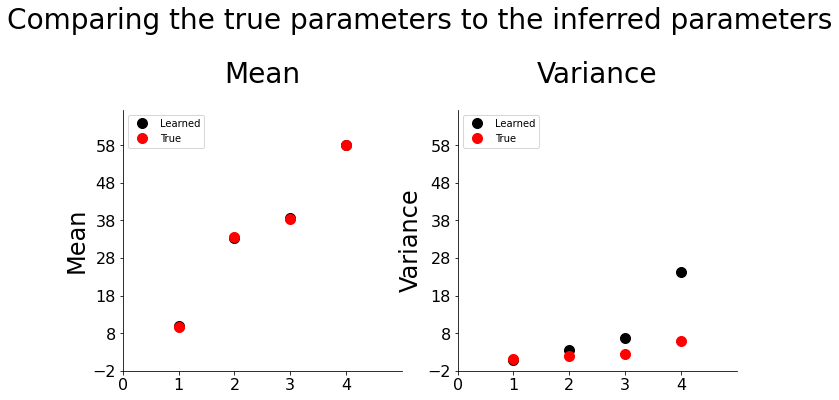

In [33]:
# 做图比较推导出的参数与实际参数
Mu_inf = np.sort(mu_p)
Mu_true = np.sort([Mu[i][0] for i in range(len(Mu))])

Var_inf = np.sort(sigma_p)
Var_true = np.sort([Var[i][0] for i in range(len(Var))])


plotsize = 11
sizeMean = 20
text_size = 16
axis_font = {'fontname':'Arial', 'size':'24'}
Title_font = {'fontname':'Arial', 'size':'28'}
x = range(1,NClasses+1)
startx = 0
endx = 5
stepsizex = 1
starty = -2
endy = max(y)
stepsizey = 10


fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.plot(x, Mu_inf, 'k.', markersize=sizeMean, label='Learned')
ax1.plot(x, Mu_true, 'r.', markersize=sizeMean, label='True')

ax2.plot(x, Var_inf, 'k.', markersize=sizeMean, label='Learned')
ax2.plot(x, Var_true, 'r.', markersize=sizeMean, label='True')
          
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks(np.arange(startx, endx, stepsizex))
ax1.yaxis.set_ticks(np.arange(starty, endy, stepsizey))
ax1.set_xlim([startx, endx])
ax1.set_ylim([starty, endy])
ax1.set_ylabel('Mean', **axis_font)
ax1.legend(loc='upper left',fontsize=text_size-6)
ax1.set_title('Mean', y=1.08, **Title_font)
ax1.figure.set_size_inches(plotsize,plotsize)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks(np.arange(startx, endx, stepsizex))
ax2.yaxis.set_ticks(np.arange(starty, endy, stepsizey))
ax2.set_xlim([startx, endx])
ax2.set_ylim([starty, endy])
ax2.set_ylabel('Variance', **axis_font)
ax2.legend(loc='upper left',fontsize=text_size-6)
ax2.set_title('Variance', y=1.08, **Title_font)
ax2.figure.set_size_inches(plotsize,plotsize)

plt.suptitle('Comparing the true parameters to the inferred parameters',**Title_font)
fig.subplots_adjust(top=0.85)
plt.show()